***What is Residual Analysis?***

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [9]:
california = fetch_california_housing()
df = pd.DataFrame(california.data,columns=california.feature_names)
df['Price'] = california.target
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [17]:
x = df.drop('Price',axis=1)#For all variables
y = df['Price']
x_train , x_test , y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [19]:
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(f"\nMAE:{mae:.2f} $100K")
print(f"\nRMSE:{rmse:.2f} $100K")
print(f"\nR^2:{r2:.2f}")


MAE:0.53 $100K

RMSE:0.75 $100K

R^2:0.58


***Calculate Residuals***

In [22]:
import pandas as pd
residuals = y_test - y_pred  

print("\nFirst 5 residuals:")
print(pd.DataFrame({'Actual': y_test[:5], 'Predicted': y_pred[:5], 'Residuals': residuals[:5]}))



First 5 residuals:
        Actual  Predicted  Residuals
20046  0.47700   0.719123  -0.242123
3024   0.45800   1.764017  -1.306017
15663  5.00001   2.709659   2.290351
20484  2.18600   2.838926  -0.652926
9814   2.78000   2.604657   0.175343


. positive residuals: underpredicted

. -ve residuals : overpredicted 

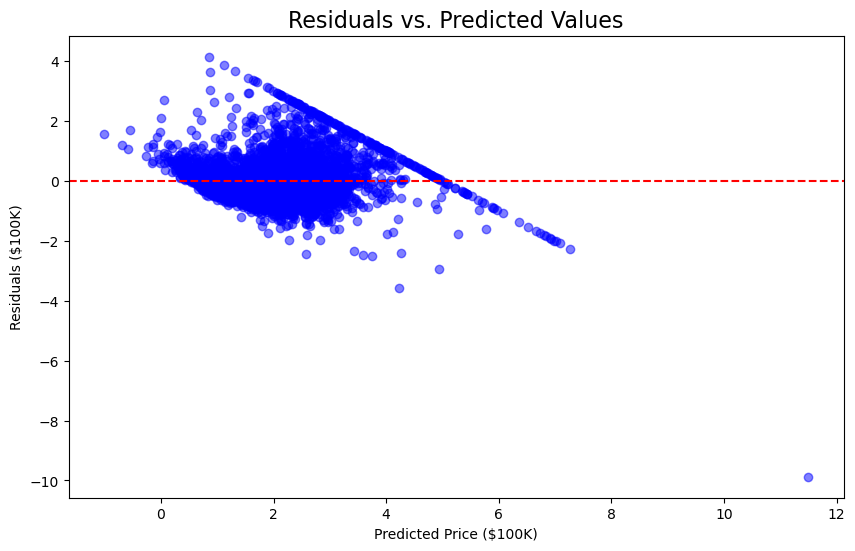

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values', fontsize=16)
plt.xlabel('Predicted Price ($100K)')
plt.ylabel('Residuals ($100K)')
plt.show() 

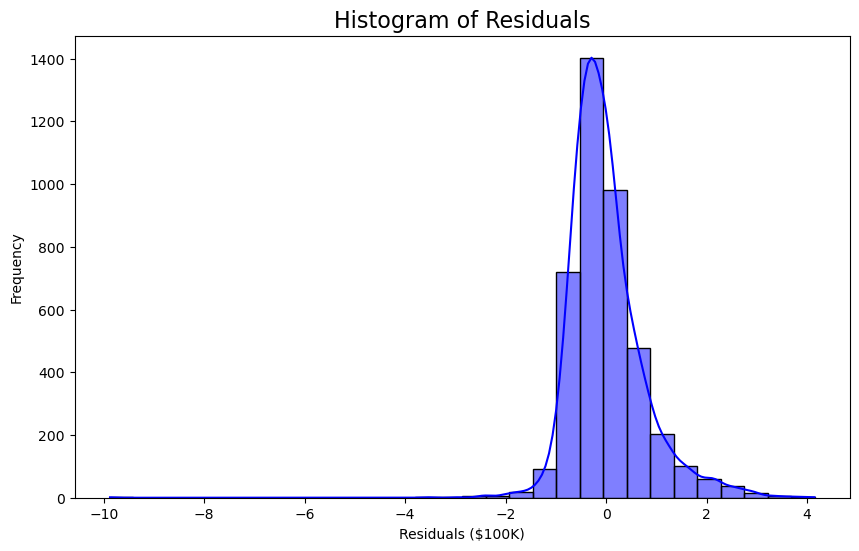

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title("Histogram of Residuals", fontsize=16)
plt.xlabel('Residuals ($100K)')
plt.ylabel("Frequency")
plt.show()

In [50]:
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.linear_model import LinearRegression 
from sklearn.datasets import make_regression
X, y= make_regression(n_samples=100, n_features=2, noise=50)
kf= KFold(n_splits=5, shuffle=True, random_state=42)
model= LinearRegression()
scores = cross_val_score (model, X, y, cv=kf, scoring='r2')
print("Cross-validation scores:", scores)
print("Average score:", scores.mean()) 

Cross-validation scores: [0.34234635 0.65491787 0.46842808 0.57133229 0.35761158]
Average score: 0.4789272361067187
